# Model Prediktif - Klasifikasi

![](https://lh3.googleusercontent.com/proxy/WJdQU-ybhq8tAy_QxhSTZYOScXVAWQ4LQZORV1_8BADrdra89fZ_FhCEy5767FgNaHUmq625ouiHcWXzdQE3JtrLSwlNMxH_4Pf0EFfxSH9m90-dWUeCBdQXh4P1Ig)

Pada tutorial ini, kita akan belajar untuk membuat sebuah model prediktif menggunakan python. Adapun tahapan pembuatan model prediktif yang akan dibahas pada tutorial kali ini antara lain:

1. Pemahaman masalah
2. Import data
3. Analisis data eksploratif
4. Penyiapan data untuk machine learning
5. Training model
6. Parameter tuning model terpilih
7. Analisis Model Terbaik dan Error Prediksinya
8. Menyimpan model

## 1 Pemahaman Masalah

Pada tutorial kali ini, kita akan membuat sebuah model prediktif untuk memprediksi apakah seorang konsumen perlu dipertahankan (*not churn*) atau dipertahankan (*churn*) dari dataset **Telco Customer Churn** yang diambil dari repositori [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn). Dataset ini merupakan data profil konsumen berdasarkan perilaku berlangganannya di masa lalu yang dikumpulkan oleh IBM.

Penjelasan masing-masing kolom pada dataset ditampilkan sebagai berikut:

1. `customerID` : ID konsumen
2. `gender` : jenis kelamin konsumen
3. `SeniorCitizen` : apakah konsumen merupakan manula atau bukan (1, 0)
4. `Partner` : apakah konsumen memiliki pasangan atau tidak (Yes, No)
5. `Dependents` : Apakah konsumen memiliki tanggungan atau tidak (Yes, No)
6. `tenure` : jumlah bulan konsumen menggunakan layanan dari perusahaan
7. `PhoneService` : apakah konsumen memiliki layanan telefon atau tidak (Yes, No)
8. `MultipleLines` : Apakah konsumen memiliki banyak jalur komunikasi atau tidak (Yes, No, No phone service)
9. `InternetService` : provider layanan internet yang digunakan konsumen (DSL, Fiber optic, No)
10. `OnlineSecurity`: Apakah konsumen memiliki keamanan online atau tidak (Yes, No, No internet service)
11. `OnlineBackup`: apakah konsumen memiliki *online backup* atau tidak(Yes, No, No internet service)
12. `DeviceProtection`: Apakah konsumen memiliki perlindungan perangkat atau tidak (Yes, No, No internet service)
13. `TechSupport` : Apakah konsumen memiliki dukungan teknis atau tidak (Yes, No, No internet service)
14. `StreamingTV` : Apakah konsumen memiliki TV streaming atau tidak (Yes, No, No internet service)
15. `StreamingMovies` : Apakah konsumen memiliki film streaming atau tidak (Yes, No, No internet service)
16. `Contract` : Jangka waktu kontrak konsumen (Month-to-month, One year, Two year)
17. `PaperlessBilling` : Apakah konsumen memiliki tagihan tanpa kertas atau tidak (Yes, No)
18. `PaymentMethod` : metode pembayaran konsumen (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19. `MonthlyCharges` : jumlah tagihan bulanan konsumen
20. `TotalCharges` : jumlah total yang dibebankan kepada konsumen
21. `Churn`: apakah konsumen tersebut *churned* atau tidak (Yes or No)

Berdasarkan penjelasan dataset tersebut, tugas anda sebagai data scientist adalah membuat sebuah model klasifikasi untuk memprediksi apakah konsumen akan *churned* atau tidak. Model tersebut nantinya akan membantu perusahaan anda memberikan sinyal kepada tim lainnya sehingga dapat mempersiapkan strategi pemasaran yang diperlukan untuk mencegahnya.



## 2 Import Data

Dataset yang digunakan, akan diambil dari repository pada tautan [berikut]( https://raw.githubusercontent.com/dianrdn/data/master/customer_churn.csv). Untuk membaca dataset tersebut, kita akan menggunakan fungsi `read_csv` dari modul `Pandas`.

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/dianrdn/data/master/customer_churn.csv', sep = ";")

### 2.1 Cek Dataset

Hal pertama yang perlu kita cek adalah 5 observasi teratas dan terbawah.

In [ ]:
# cek 5 observasi teratas
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,2985,2985.0,0
1,5575-GNVDE,Male,0,0,0,34,1,DSL,1,0,1,0,0,0,One year,0,Mailed check,5695,18895.0,0
2,3668-QPYBK,Male,0,0,0,2,1,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,5385,10815.0,1
3,7795-CFOCW,Male,0,0,0,45,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),423,184075.0,0
4,9237-HQITU,Female,0,0,0,2,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,707,15165.0,1


In [ ]:
# cek 5 observasi terbawah
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,1,1,24,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,848,19905.0,0
7039,2234-XADUH,Female,0,1,1,72,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),1032,73629.0,0
7040,4801-JZAZL,Female,0,1,1,11,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,296,34645.0,0
7041,8361-LTMKD,Male,1,1,0,4,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,744,3066.0,1
7042,3186-AJIEK,Male,0,0,0,66,1,Fiber optic,1,0,1,1,1,1,Two year,1,Bank transfer (automatic),10565,68445.0,0


Selanjutnya kita dapat menggunakan method `info` untuk memperoleh ringkasan singkat terkait dataset tersebut. Method tersebut akan menampilkan  ringkasan data, seperti: jumlah baris dan kolom, serta nama kolom dan jenis data masing-masing kolom.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


Berdasarkan output yang dihasilkan, terdapat 15 kolom numerik dan 5 kolom karakter. Pada tutorial kali ini, kita tidak akan menggunakan kolom customer ID, dimana kolom tersebut merupakan nilai unik yang mewakili masing-masing konsumen.

In [ ]:
data['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [ ]:
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [ ]:
data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [ ]:
data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [ ]:
data['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

Untuk melihat ringkasan data variabel numerik, jalankan perintah berikut:

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043.0,0.483033,0.499748,0.0,0.0,0.0,1.0,1.0
Dependents,7043.0,0.299588,0.458110,0.0,0.0,0.0,1.0,1.0
tenure,7043.0,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043.0,0.903166,0.295752,0.0,1.0,1.0,1.0,1.0
OnlineSecurity,7043.0,0.286668,0.452237,0.0,0.0,0.0,1.0,1.0
OnlineBackup,7043.0,0.344881,0.475363,0.0,0.0,0.0,1.0,1.0
DeviceProtection,7043.0,0.343888,0.475038,0.0,0.0,0.0,1.0,1.0
TechSupport,7043.0,0.290217,0.453895,0.0,0.0,0.0,1.0,1.0
StreamingTV,7043.0,0.384353,0.486477,0.0,0.0,0.0,1.0,1.0


### 2.3 Data Splitting

Sebelum melangkah lebih jauh alangkah baiknya dataset yang telah kita miliki dipisah menjadi dataset `training` (untuk melatih model) dan dataset `test` (untuk mengevaluasi model). 

Terdapat dua buah jenis sampling pada tahapan *data splitting*, yaitu:

1. *random sampling* : sampling acak tanpa mempertimbangkan adanya strata dalam data
2. *startified random sampling* : sampling dengan memperhatikan strata dalam sebuah variabel.

Dalam proses pembentukan model kali ini, kita akan menggunakan metode kedua dengan tujuan untuk memperoleh distribusi yang seragam dari variabel target.

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['Churn']):
  train = data.loc[train_index]
  test = data.loc[test_index]

## 3 Analisis Data Eksploratif

Analsiis data eksploratif (EDA) ditujukan untuk mengenali data sebelum kita menentukan algoritma yang cocok digunakan untuk menganalisa data lebih lanjut. EDA merupakan sebuah proses iteratif yang secara garis besar menjawab beberapa pertanyaan umum, seperti:

1. Bagaimana distribusi data pada masing-masing variabel?
2. Apakah terdapat asosiasi atau hubungan antar variabel dalam data?

### 3.1 Variasi

Distribusi data dapat divisualisasikan menggunakan histogram (variabel numerik) dan barplot(variabel kategori).

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

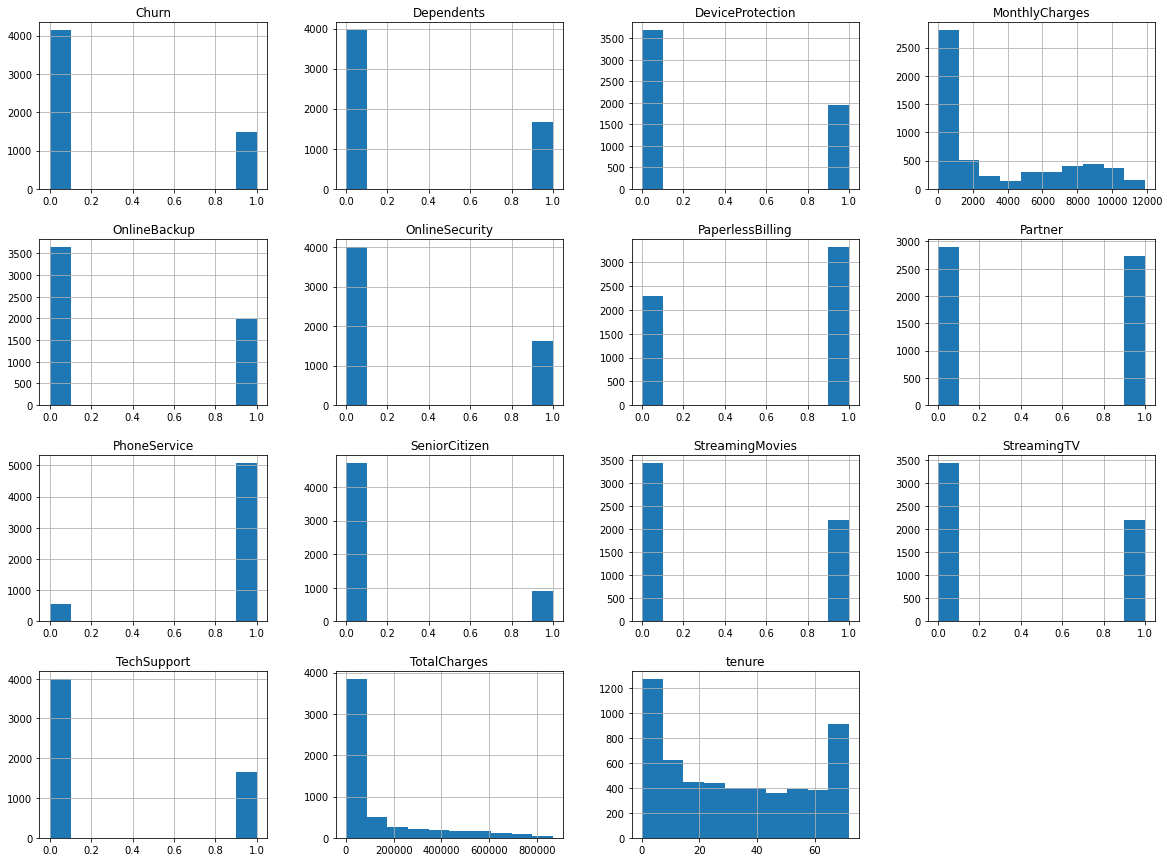

In [ ]:
train.hist(figsize=(20,15))
plt.show()

Berdasarkan hasil visualisasi dapat dilihat distribusi data untuk variabel numerik dengan nilai kontinu tidak simertris atau tidak berdistribusi normal. Selain itu, pada variabel target ('Churn') distribusi data tidak seimbang antara kategori "churn" dan tidak. Distribusi yang tidak seimbang tersebut akan menghasilkan model yang tidak baik.

Untuk menhadapi kondisi data yang tidak seimbang, terdapat sejumlah pendekatan, antara lain:

1. Menggunakan metrik evaluasi yang tepat
2. Mengubah algoritma model yang dibuat
3. Melakukan resampling (menyeimbangkan masing-masing kelas)

Pada latihan ini, kita akan menggunakan 2 pendekatan awal, yaitu: menggunakan metode evaluasi yang tepat (AUC, Presisi, Recall, dan F1-Score) dan menggunakan metode algoritma machine learning yang sesuai untuk data tidak seimbang.

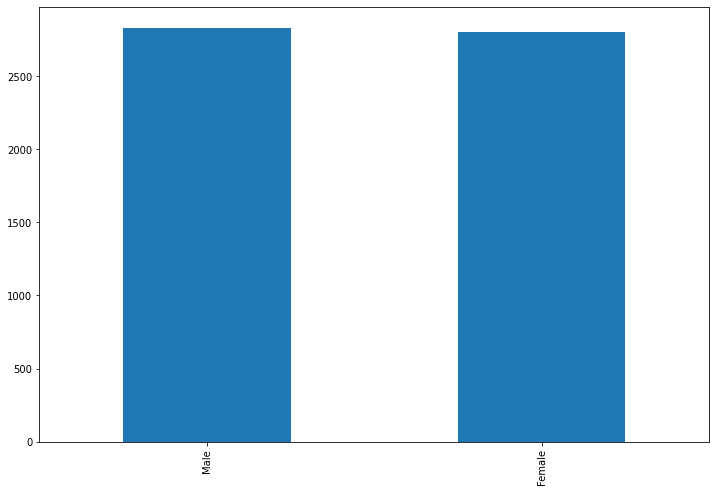

In [ ]:
train['gender'].value_counts().plot(kind = 'bar', figsize=(12,8))
plt.show()

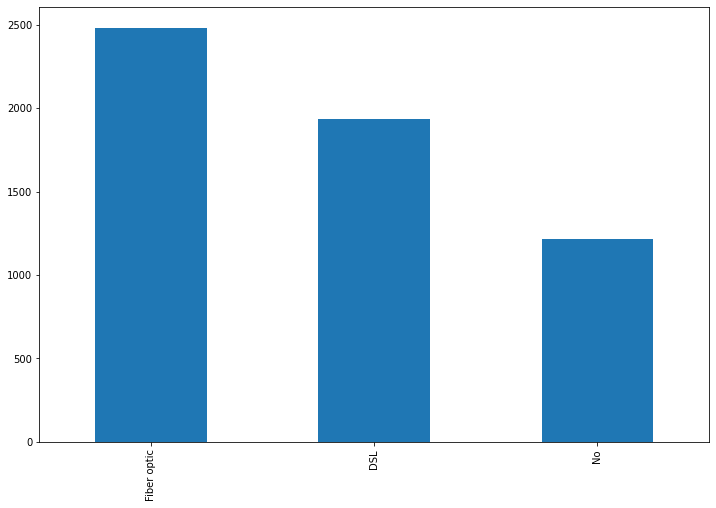

In [ ]:
train['InternetService'].value_counts().plot(kind = 'bar', figsize=(12,8))
plt.show()

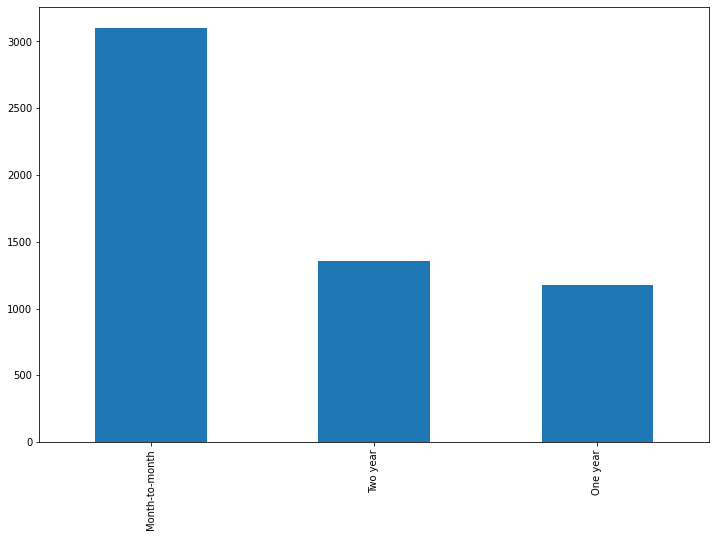

In [ ]:
train['Contract'].value_counts().plot(kind = 'bar', figsize=(12,8))
plt.show()

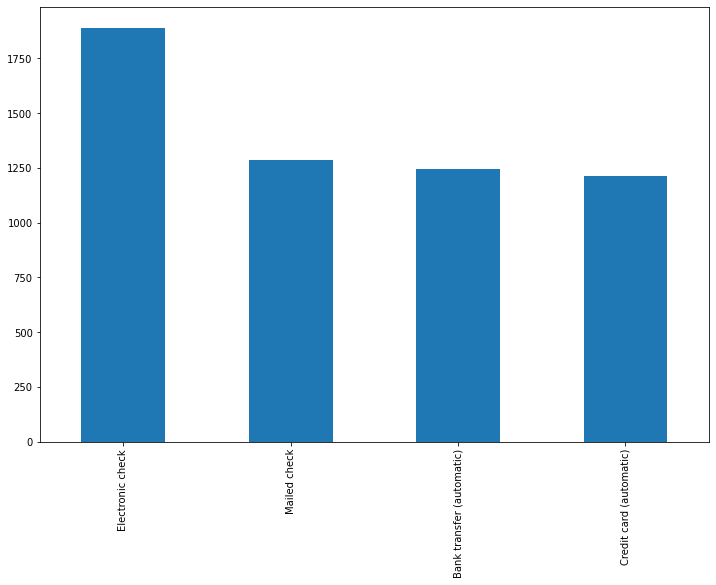

In [ ]:
train['PaymentMethod'].value_counts().plot(kind = 'bar', figsize=(12,8))
plt.show()

### 3.2 Kovarians

Visualisasi kovarians dapat mengggunakan scatterplot dan boxplot.

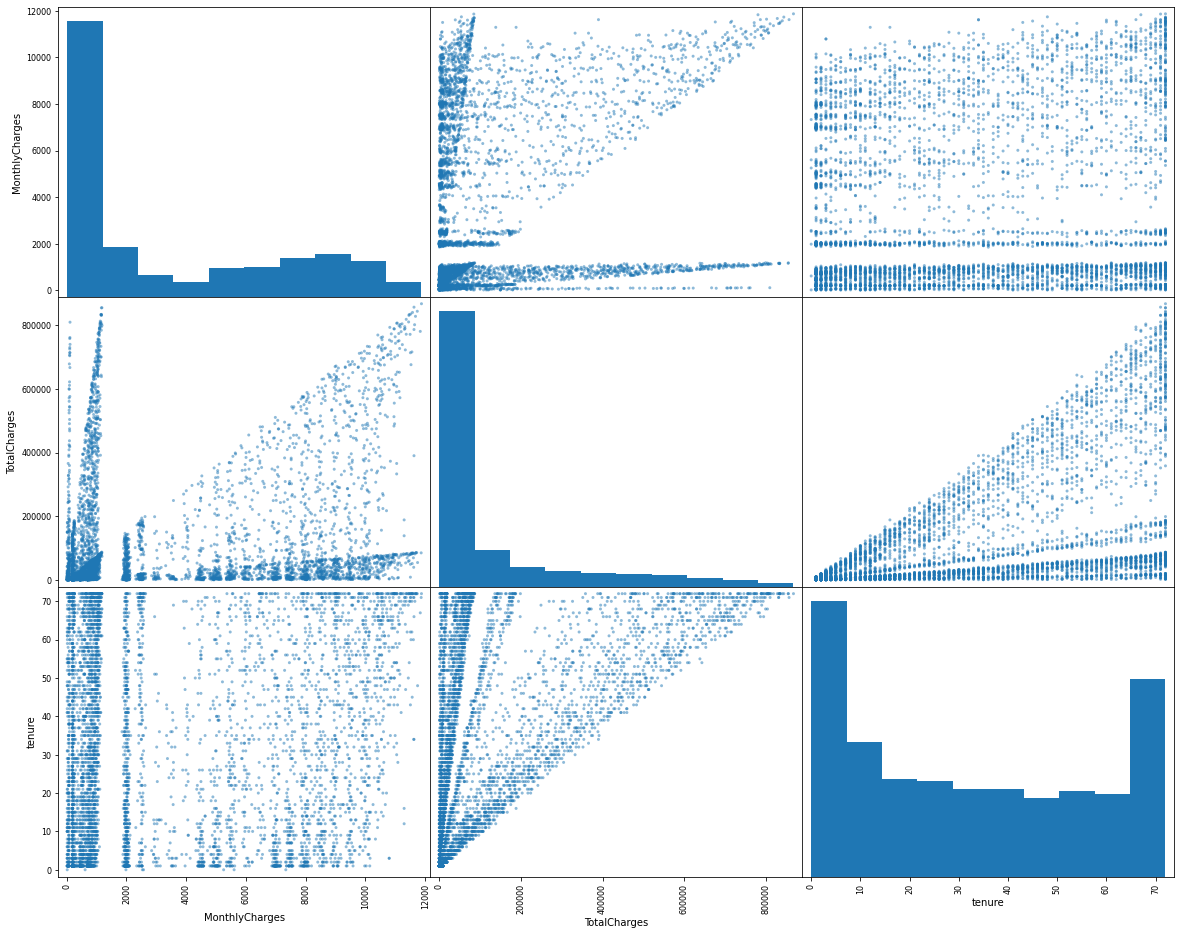

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(train.loc[:,['MonthlyCharges','TotalCharges','tenure']], figsize=(20, 16))

plt.show()

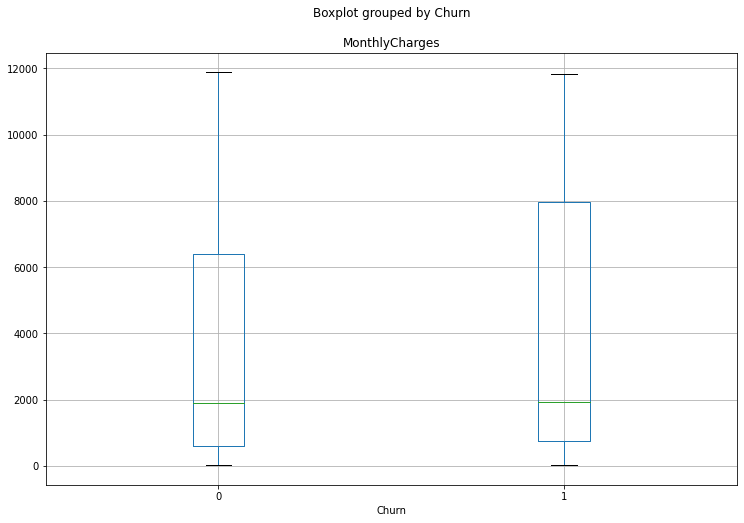

In [ ]:
train.boxplot(column='MonthlyCharges', by = 'Churn', figsize=(12,8))
plt.show()

## 4 Penyiapan Data untuk Machine Learning

*Data preprocessing* dan *engineering* mengacu pada proses penambahan, penghapusan, atau transformasi data. Waktu yang diperlukan untuk memikirkan identifikasi kebutuhan *data engineering* dapat berlangsung cukup lama dan proprsinya akan menjadi yang terbesar dibandingkan analisa lainnya. Hal ini disebabkan karena kita perlu untuk memahami data apa yang akan kita oleh atau diinputkan ke dalam model.

Untuk menyederhanakan proses *feature engineerinh*, kita harus memikirkannya sebagai sebuah *blueprint* dibanding melakukan tiap tugasnya secara satu persatu. Hal ini membantu kita dalam dua hal:

1. Berpikir secara berurutan
2. Mengaplikasikannya secara tepat selama proses *resampling*

Memikirkan *feature engineering* sebagai sebuah *blueprint* memaksa kita untuk memikirkan urutan langkah-langkah *preprocessing* data. Meskipun setiap masalah mengharuskan kita untuk memikirkan efek *preprocessing* berurutan, ada beberapa saran umum yang harus kita pertimbangkan:

* Jika menggunakan log atau transformasi Box-Cox, jangan memusatkan data terlebih dahulu atau melakukan operasi apa pun yang dapat membuat data menjadi tidak positif. Atau, gunakan transformasi Yeo-Johnson sehingga kita tidak perlu khawatir tentang hal ini.
* *One-hot* atau *dummy encoding* biasanya menghasilkan data jarang (*sparse*) yang dapat digunakan oleh banyak algoritma secara efisien. Jika kita menstandarisasikan data tersebut, kita akan membuat data menjadi padat (*dense*) dan kita kehilangan efisiensi komputasi. Akibatnya, sering kali lebih disukai untuk standardisasi fitur numerik kita dan kemudian *one-hot/dummy endode*.
* Jika kila mengelompokkan kategori (*lumping*) yang jarang terjadi  secara bersamaan, lakukan sebelum *one-hot/dummy endode*.
* Meskipun kita dapat melakukan prosedur pengurangan dimensi pada fitur-fitur kategorikal, adalah umum untuk melakukannya terutama pada fitur numerik ketika melakukannya untuk tujuan feature engineering.

In [ ]:
train_copy = train.copy()
train_labels = train_copy["Churn"].copy()
train_copy = train_copy.drop(["customerID", "Churn"], axis=1)
train_copy

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3738,Male,0,0,0,35,0,DSL,0,0,1,0,1,1,Month-to-month,0,Electronic check,492,170165.0
3151,Male,0,1,1,15,1,Fiber optic,1,0,0,0,0,0,Month-to-month,0,Mailed check,751,115155.0
4860,Male,0,1,1,13,0,DSL,1,1,0,1,0,0,Two year,0,Mailed check,4055,59035.0
3867,Female,0,1,0,26,1,DSL,0,1,1,0,1,1,Two year,1,Credit card (automatic),735,19057.0
3810,Male,0,1,1,1,1,DSL,0,0,0,0,0,0,Month-to-month,0,Electronic check,4455,4455.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,Female,0,1,0,71,1,Fiber optic,0,1,1,1,1,1,Two year,0,Electronic check,10925,77077.0
6227,Male,0,0,0,2,1,DSL,0,0,0,0,0,0,Month-to-month,0,Bank transfer (automatic),4605,8035.0
4673,Female,1,0,0,25,1,Fiber optic,1,1,0,0,1,1,Month-to-month,1,Mailed check,1028,26602.0
2710,Female,0,1,0,24,1,No,0,0,0,0,0,0,One year,0,Credit card (automatic),204,4828.0


Proses penulisan blueprint akan dibantu dengan *custom transformer* yang dibuat menggunakan perintah di bawah ini. Transformer ini menerima input berupa list kolom dari dataframe dan meneruskannya pada tahapan transformasi data selanjutnya. Transformer ini mengurangi proses penulisan nama kolom yang akan masuk ke dalam tahapan transformasi, sehingga kita hanya perlu fokus pada tahapan transformasi apa yang akan dilakukan pada data.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values

Penulisan blueprint/pipeline transformasi pada proses *feature engineering* ditampilkan pada perintah berikut: 

In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_attribs1 = list(train_copy.drop(['MonthlyCharges','TotalCharges','tenure',
                                     'gender','InternetService','Contract',
                                    'PaymentMethod'], axis=1))
num_attribs2 = ['MonthlyCharges','TotalCharges','tenure']
cat_attribs = ['gender','InternetService','Contract','PaymentMethod']

num_pipeline1 = Pipeline([
  ('selector', DataFrameSelector(num_attribs2)),
  ('imputer', KNNImputer()),
  ('std_scaler', StandardScaler())
])

num_pipeline2 = Pipeline([
  ('selector', DataFrameSelector(num_attribs1))
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_attribs)),
  ('imputer', SimpleImputer(strategy="most_frequent")),
  ('onehotencoder', OneHotEncoder(sparse=False))
])

full_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline1", num_pipeline1),
  ("num_pipeline2", num_pipeline2),
  ("cat_pipeline", cat_pipeline)
])

Menerapkan blueprint pada data training.

In [ ]:
train_prepared = full_pipeline.fit_transform(train_copy)
train_prepared

array([[-0.83484466,  0.22218961,  0.10237124, ...,  0.        ,
         1.        ,  0.        ],
       [-0.76369101, -0.06292399, -0.71174346, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.14399886, -0.35379065, -0.79315493, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.68759231, -0.52188899, -0.30468611, ...,  0.        ,
         0.        ,  1.        ],
       [-0.91396533, -0.63474235, -0.34539184, ...,  1.        ,
         0.        ,  0.        ],
       [-0.40270297, -0.65410064, -1.07809507, ...,  0.        ,
         0.        ,  1.        ]])

Untuk mengkonversi array ke dataframe, jalankan sintaks berikut:

In [ ]:
labels = num_attribs2 + num_attribs1 + train_copy['gender'].unique().tolist() + train_copy['InternetService'].unique().tolist() +\
        train_copy['Contract'].unique().tolist() + train_copy['PaymentMethod'].unique().tolist() 
train_df = pd.DataFrame(train_prepared, columns=labels)
train_df

,MonthlyCharges,TotalCharges,tenure,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Male,Female,DSL,Fiber optic,No,Month-to-month,Two year,One year,Electronic check,Mailed check,Credit card (automatic),Bank transfer (automatic)
0,-0.834845,0.222190,0.102371,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.763691,-0.062924,-0.711743,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.143999,-0.353791,-0.793155,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.768087,-0.560994,-0.263980,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.253889,-0.636676,-1.281624,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,2.031356,-0.260280,1.567778,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5630,0.295097,-0.618121,-1.240918,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5631,-0.687592,-0.521889,-0.304686,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5632,-0.913965,-0.634742,-0.345392,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## 5 Model

### 5.1 Random Forest

Bagging (agregasi bootstrap) adalah teknik yang dapat mengubah model pohon tunggal dengan varian tinggi dan kemampuan prediksi yang buruk menjadi fungsi prediksi yang cukup akurat. Sayangnya, bagging biasanya kekurangan, yiatu: adanya korelasi pada tiap pohon yang mengurangi kinerja keseluruhan model. *Random forest* adalah modifikasi bagging yang membangun koleksi besar pohon yang tidak berkorelasi dan telah menjadi algoritma pembelajaran “out-of-the-box” yang sangat populer yang dengan kinerja prediksi yang baik. 

*Random forest* dibangun di atas prinsip-prinsip dasar yang sama seperti *decision tress* dan bagging. Bagging memperkenalkan komponen acak ke dalam proses pembangunan pohon yang mengurangi varian prediksi pohon tunggal dan meningkatkan kinerja prediksi. Namun, pohon-pohon di bagging tidak sepenuhnya independen satu sama lain karena semua prediktor asli dianggap di setiap split setiap pohon. Sebaliknya, pohon dari sampel bootstrap yang berbeda biasanya memiliki struktur yang mirip satu sama lain (terutama di bagian atas pohon) karena hubungan yang mendasarinya.

Sebagai contoh, jika kita membuat enam pohon keputusan dengan sampel bootstrap data perumahan Boston yang berbeda, kita melihat bahwa puncak pohon semua memiliki struktur yang sangat mirip. Meskipun ada 15 variabel prediktor untuk dipecah, keenam pohon memiliki kedua variabel lstat dan rm yang mendorong beberapa split pertama.

Sebagai contoh, jika kita membuat enam *decision trees* dengan sampel bootstrap [data perumahan Boston](http://uc-r.github.io/(http://lib.stat.cmu.edu/datasets/boston)) yang berbeda, kita melihat bahwa puncak pohon semua memiliki struktur yang sangat mirip. Meskipun ada 15 variabel prediktor untuk dipecah, keenam pohon memiliki kedua variabel `lstat` dan `rm` yang mendorong beberapa split pertama.

![Enam decision trees berdasarkan sampel bootsrap yang berbeda-beda](http://uc-r.github.io/public/images/analytics/random_forests/tree-correlation-1.png)

Karakteristik ini dikenal sebagai **korelasi pohon** dan mencegah bagging dari secara optimal mengurangi varians dari nilai-nilai prediktif. Untuk mengurangi varian lebih lanjut, kita perlu meminimalkan jumlah korelasi antar pohon-pohon tersebut. Ini bisa dicapai dengan menyuntikkan lebih banyak keacakan ke dalam proses penanaman pohon. *Random Forest* mencapai ini dalam dua cara:

1. **Bootstrap**: mirip dengan bagging, setiap pohon ditumbuhkan ke set data *bootstrap resampled*, yang membuatnya berbeda dan agak mendekorelasi antar pohon tersebut.
2. **Split-variable randomization**: setiap kali pemisahan dilakukan, pencarian untuk variabel terbagi terbatas pada subset acak $m$ dari variabel $p$. Untuk pohon regresi, nilai default tipikal adalah $m = p/3$ tetapi ini harus dianggap sebagai *parameter tuning*. Ketika $m = p$, jumlah pengacakan hanya menggunakan langkah 1 dan sama dengan bagging.

Algoritma dasar dari *random forest* adalah sebagai berikut:

```
1.  Diberikan set data training
2.  Pilih jumlah pohon yang akan dibangun (n_trees)
3.  for i = 1 to n_trees do
4.  | Hasilkan sampel bootstrap dari data asli
5.  | Tumbuhkan pohon regresi / klasifikasi ke data yang di-bootstrap
6.  | for each split do
7.  | | Pilih variabel m_try secara acak dari semua variabel p
8.  | | Pilih variabel / titik-split terbaik di antara m_try
9.  | | Membagi node menjadi dua node anak
10. | end
11. | Gunakan kriteria berhenti model pohon biasa untuk menentukan 
    | kapan pohon selesai (tapi jangan pangkas)
12. end
13. Output ensemble of trees 
```

Karena algoritma secara acak memilih sampel bootstrap untuk dilatih dan prediktor digunakan pada setiap split, korelasi pohon akan berkurang melebihi bagging.

#### OOB Error vs Test Set Error

Mirip dengan bagging, manfaat alami dari proses *bootstrap resampling* adalah *randomforest* memiliki sampel *out-of-bag* (OOB) yang memberikan perkiraan kesalahan pengujian yang efisien dan masuk akal. Ini memberikan satu set validasi bawaan tanpa kerja ekstra , dan kita tidak perlu mengorbankan data *training* apa pun untuk digunakan untuk validasi. Ini membuat proses identifikasi jumlah pohon yang diperlukan untuk menstabilkan tingkat kesalahan selama proses *tuning* menjadi lebih efisien; Namun, seperti yang diilustrasikan di bawah ini, beberapa perbedaan antara kesalahan OOB dan kesalahan tes diharapkan.

![Random forest OOB vs validation error (Sumber: http://uc-r.github.io/)](http://uc-r.github.io/public/images/analytics/random_forests/oob-error-compare-1.svg)

Selain itu, banyak paket tidak melacak pengamatan mana yang merupakan bagian dari sampel OOB untuk pohon tertentu dan yang tidak. Jika kita membandingkan beberapa model dengan yang lain, kita ingin membuat skor masing-masing pada set validasi yang sama untuk membandingkan kinerja. Selain itu, meskipun secara teknis dimungkinkan untuk menghitung metrik tertentu seperti *root mean squared logarithmic error* (RMSLE) pada sampel OOB, itu tidak dibangun untuk semua paket. Jadi jika kita ingin membandingkan beberapa model atau menggunakan fungsi *loss* yang sedikit lebih tradisional, kita mungkin ingin tetap melakukan validasi silang.

#### Kelebihan dan Kekurangan

**Kelbihan**

* Biasanya memiliki kinerja yang sangat bagus
* “*Out-of-the-box*” yang luar biasa bagus - sangat sedikit penyesuaian yang diperlukan
* Kumpulan validasi bawaan - tidak perlu mengorbankan data untuk validasi tambahan
* Tidak diperlukan pra-pemrosesan
* Bersifat *robust* dengan adanya *outlier*

**Kekurangan**

* Dapat menjadi lambat pada set data besar
* Meskipun akurat, seringkali tidak dapat bersaing dengan algoritma *boosting*
* Kurang mudah untuk ditafsirkan


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# membuat model
rf_class = RandomForestClassifier()
rf_class.fit(train_prepared, train_labels)

# validasi silang
rf_scores = cross_val_score(rf_class, train_prepared, train_labels,
                         scoring="roc_auc", cv=10)

# nilai rmse validasi silang
display_scores(rf_scores)

[0.85681159 0.82697262 0.83229469 0.82245572 0.82721363 0.82806471
 0.83506792 0.81133482 0.80195668 0.79861178]
Mean AUC : 0.8240784183700851
SD AUC : 0.01611454810231169


### 5.2 Gradient Boosting Model

*Gradient boosted machines* (GBMs) adalah algoritma *machine learning* yang sangat populer yang telah terbukti berhasil di banyak domain dan merupakan salah satu metode utama untuk memenangkan kompetisi Kaggle. Sementara *random forest* membangun ansambel pohon independen yang dalam, GBM membangun ansambel pohon berturut-turut yang dangkal dan lemah dengan setiap pohon belajar dan meningkatkan pada sebelumnya. Ketika digabungkan, banyak pohon berturut-turut yang lemah ini menghasilkan "komite" yang kuat yang seringkali sulit dikalahkan dengan algoritma lain. 

Beberapa model *supervised machine learning* tersusun atas model prediksi tunggal (yaitu [regresi linier](http://uc-r.github.io/linear_regression), [penalized model](http://uc-r.github.io/regularized_regression), [naive bayes](http://uc-r.github.io/naive_bayes), [support vector machines](http://uc-r.github.io/svm)). Atau, pendekatan lain seperti [bagging](http://uc-r.github.io/regression_trees) dan [random forest](http://uc-r.github.io/random_forests) dibangun di atas gagasan membangun ansambel model di mana masing-masing model memprediksi hasil dan kemudian hasil prediksi dirata-rata (regresi) atau menggunakan sistem voting terbanyak (klasifikasi). Keluarga metode *boosting* didasarkan pada strategi konstruktif yang berbeda dari pembentukan ansambel.

Gagasan utama *boosting* adalah menambahkan model-model baru ke ansambel secara berurutan. Pada setiap iterasi tertentu, model pembelajaran dasar-lemah yang baru dilatih sehubungan dengan kesalahan seluruh rangkaian yang dipelajari sejauh ini.

![Pendekatan boosting](http://uc-r.github.io/public/images/analytics/gbm/boosted-trees-process.png)

Mari kita bahas masing-masing komponen kalimat sebelumnya dengan lebih detail karena mereka penting untuk diketahui.

**Base-learning models**: *Boosting* adalah kerangka kerja yang secara iteratif meningkatkan model pembelajaran yang lemah. Banyak aplikasi *gradient boosting* memungkinkan kita untuk "memasukkan" berbagai kelas *weak learner* sesuai keinginan kita Namun dalam praktiknya, algoritma yang ditingkatkan hampir selalu menggunakan *decision trees* sebagai *base learner*-nya. Konsekuensinya, tutorial ini akan membahas *boosting* dalam konteks pohon regresi atau klasifikasi.

**Training weak models**: *Weak model* adalah model yang tingkat kesalahannya hanya sedikit lebih baik daripada menebak secara acak. Gagasan di balik *boosting* adalah bahwa setiap model berurutan membangun model lemah sederhana untuk sedikit memperbaiki kesalahan yang tersisa. Sehubungan dengan *decision trees*, pohon dangkal mewakili *weak learner*. Umumnya, pohon dengan hanya 1-6 pohon digunakan. Menggabungkan banyak *weak model* (versus yang kuat) memiliki beberapa manfaat:

* *Speed*: Membangun model lemah adalah murah secara proses komputasi
* *Accuracy improvement*: *Weak model* memungkinkan algoritma untuk belajar secara lambat; melakukan penyesuaian kecil di area baru yang kinerjanya tidak baik. Secara umum, pendekatan statistik *weak learner* cenderung berkinerja baik.
* *Avoids overfitting*: Karena hanya membuat perbaikan bertahap kecil dengan masing-masing model dalam ansambel, ini memungkinkan kita untuk menghentikan proses pembelajaran segera setelah overfitting telah terdeteksi (biasanya dengan menggunakan validasi silang).

**Sequential training with respect to errors**: *Boosted trees* ditumbuhkan secara berurutan; setiap pohon ditumbuhkan menggunakan informasi dari pohon yang sebelumnya ditumbuhkan. Algoritma dasar untuk *boosted model* dapat digeneralisasi ke yang berikut ini di mana $x$ mewakili fitur data dan variabel $y$ mewakili respons:

1. Buat *decision trees* pada data: $F_1\left(x\right)=y$
2. Buat *decision trees* selanjutnya menggunakan data residual dari *decision trees* sebelumnya: $h_1\left(x\right)=y-F_1\left(x\right)$.
3. Tambahkan pohon baru tersebut ke dalam algoritma: $F_2\left(x\right)= F_1\left(x\right)+h_1\left(x\right)$
4. Buat *decision trees* baru pada residu $F_2$: $h_2\left(x\right)=y - F_2\left(x\right)$
5. Tambahkan *decision trees* tersebut ke dalam algoritma: $F_3\left(x\right)=F_2\left(x\right)+h_2\left(x\right)$
6. Lanjutkan proses tersebut hingga sebuah mekanisme (biasanya hasil validasi silang) menyatakan proses tersebut harus berhenti.

#### Gradient Descent

Banyak algoritma, termasuk pohon keputusan, fokus pada meminimalkan residu dan oleh karena itu, menekankan fungsi *loss* MSE. Algoritma yang dibahas pada bagian sebelumnya menguraikan pendekatan *sequantial decision trees fitting* untuk meminimalkan kesalahan. Pendekatan khusus ini adalah bagaimana meningkatkan gradien meminimalkan fungsi *loss* *mean squared error* (MSE). Namun, seringkali kita ingin fokus pada fungsi *loss* lainnya seperti *mean absolute error* (MAE) atau untuk dapat menerapkan metode ini ke masalah klasifikasi dengan fungsi *loss* seperti *deviance*. *Gradient boosting machine*  berasal dari fakta bahwa prosedur ini dapat digeneralisasi ke fungsi *loss* selain MSE.

*Gradient Boosting* dianggap sebagai algoritma *gradient descent*. *Gradient descent* adalah algoritma optimasi yang sangat umum yang mampu menemukan solusi optimal untuk berbagai masalah. Gagasan umum *gradient descent* adalah mengubah parameter secara iteratif untuk meminimalkan fungsi *cost*. Misalkan kita adalah pemain ski menuruni bukit dan berpacu dengan teman kita. Strategi yang baik untuk mengalahkan teman kita ke bawah adalah mengambil jalan setapak dengan kemiringan paling curam. Inilah yang dilakukan oleh *gradient descent* - ini mengukur gradient lokal dari fungsi *loss* (*cost*) untuk sekumpulan parameter ($\Theta$) dan mengambil langkah-langkah ke arah gradien yang menurun. Setelah gradien nol, kita telah mencapai minimum.


![Gradient descent (Sumber: Geron, 2017)](http://uc-r.github.io/public/images/analytics/gbm/gradient_descent.png)

Gradient descent dapat dilakukan pada setiap fungsi *loss* yang dapat diturunkan (*differentiable*).  Akibatnya, ini memungkinkan GBM untuk mengoptimalkan berbagai fungsi *loss* seperti yang diinginkan. Parameter penting dalam *gradient descent* adalah *step size* yang ditentukan oleh *learning rate*. Jika *learning rate* terlalu kecil, maka algoritma akan mengambil banyak iterasi untuk menemukan minimum. Di sisi lain, jika tingkat pembelajaran terlalu tinggi, kita mungkin melewati batas minimum dan berakhir lebih jauh daripada saat kita mulai.

![Perbandinga learning rate (Sumber: Geron, 2017)](http://uc-r.github.io/public/images/analytics/gbm/learning_rate_comparison.png)

Selain itu, tidak semua fungsi *cost* bersifat *covex* (berbentuk mangkuk). Mungkin ada *local minimas*, *plateaus*, dan medan tidak teratur lainnya dari fungsi *loss* yang membuat sulit menemukan minimum global. *Stochastic gradient descent* dapat membantu kita mengatasi masalah ini dengan mengambil sampel sebagian kecil dari pengamatan pelatihan (biasanya tanpa penggantian) dan menumbuhkan pohon berikutnya menggunakan subsampel itu. Ini membuat algoritma lebih cepat tetapi sifat stokastik dari random sampling juga menambahkan beberapa sifat acak dalam menuruni gradien fungsi *loss*. Meskipun keacakan ini tidak memungkinkan algoritma untuk menemukan minimum global absolut, itu sebenarnya dapat membantu algoritma melompat keluar dari minimum lokal dan mematikan *plateus* dan mendekati minimum global.

![Stocahstic gradient descent (Sumber: Geron, 2017)](http://uc-r.github.io/public/images/analytics/gbm/stochastic_gradient_descent.png)

#### Kelebihan dan Kekurangan

**Kelebihan**

* Seringkali memberikan akurasi prediksi yang tidak dapat dikalahkan.
* Banyak fleksibilitas - dapat mengoptimalkan berbagai fungsi *loss* dan menyediakan beberapa opsi *hyperparameter tuning* yang membuat fungsi ini sangat fleksibel.
* Tidak diperlukan pra-pemrosesan data - seringkali berfungsi dengan baik dengan nilai kategorikal dan numerik sebagaimana adanya.
* Menangani data yang hilang - tidak diperlukan imputasi.

**Kekurangan**

* GBM akan terus ditingkatkan untuk meminimalkan semua kesalahan. Ini bisa terlalu menekankan outlier dan menyebabkan overfitting. Harus menggunakan validasi silang untuk menetralisir.
* Mahal secara komputasi - GBM sering membutuhkan banyak pohon (> 1000) yang bisa menghabiskan banyak waktu dan memori.
* Fleksibilitas yang tinggi menghasilkan banyak parameter yang berinteraksi dan sangat memengaruhi perilaku pendekatan (jumlah iterasi, kedalaman pohon, parameter regularisasi, dll.). Ini membutuhkan pencarian kotak besar selama penyetelan.
* Kurang dapat diartikan meskipun hal ini mudah diatasi dengan berbagai alat (variable importance, partial dependence plots, LIME, dll.).


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# membuat model
gb_class = GradientBoostingClassifier(max_depth=2, n_estimators=3, learning_rate=1.0)
gb_class.fit(train_prepared, train_labels)

# validasi silang
gb_scores = cross_val_score(gb_class, train_prepared, train_labels,
                         scoring="roc_auc", cv=10)

# nilai auc validasi silang
display_scores(gb_scores)

[0.86304348 0.83683575 0.83541868 0.83851852 0.84905813 0.84138216
 0.84905003 0.79597478 0.81786791 0.79150121]
Mean AUC : 0.8318650644885184
SD AUC : 0.022019244634769914
